In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
from pandas import DataFrame
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

# XGBoost

In [2]:
XGBModel = XGBRegressor(learning_rate=0.05,
                   n_estimators=2100,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   random_state=7,
                   n_jobs=-1,
                   tree_method='gpu_hist',
                   gpu_id=0)

XGBModel.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.46,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=2100, n_jobs=-1,
             nthread=-1, num_parallel_tree=1, predictor='auto', ...)

In [3]:
test_pre = XGBModel.predict(X_test)
train_pre = XGBModel.predict(X_train)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 169379541.687
Test MSE: 382018246.482
Train R^2: 0.972
Test R^2: 0.953


Text(0, 0.5, 'Sale_Price')

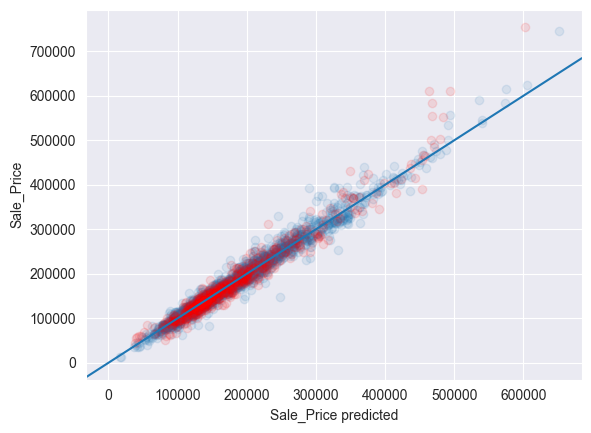

In [11]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Indaghiamo le previsioni ottenute dal modello

In [136]:
pred = np.exp(test_pre.tolist())
real = np.exp(Y_test.to_numpy().tolist())

errors = [float(pred[i]) - float(real[i]) for i in range(len(pred))]
errors = np.abs(errors)
errors

array([1.25175225e+04, 5.74518180e+03, 1.11586444e+04, 1.24321049e+04,
       4.18482176e+04, 2.07306660e+03, 2.31776725e+04, 2.66103883e+03,
       3.38451335e+04, 2.41847410e+02, 9.96764610e+03, 3.45886359e+03,
       4.05302029e+03, 3.88145538e+03, 1.69856363e+04, 5.83570468e+03,
       8.17052140e+03, 7.83249939e+03, 1.06275165e+04, 2.47416535e+04,
       9.66835641e+03, 6.55650454e+03, 4.29150024e+04, 4.98485812e+01,
       1.92617550e+03, 3.13305538e+03, 6.94722394e+03, 2.66256653e+04,
       7.31226676e+03, 4.97558603e+03, 3.26190781e+03, 1.99323228e+04,
       1.15051732e+04, 9.73556249e+03, 6.70320483e+03, 1.46697976e+04,
       6.95485903e+03, 1.67868410e+04, 3.09732536e+04, 8.34668083e+03,
       2.72477759e+03, 6.46713215e+02, 6.26430283e+03, 4.26849772e+02,
       7.74792870e+03, 3.37228957e+04, 9.39582255e+01, 3.46401286e+03,
       2.35842893e+03, 2.63584008e+04, 1.73572316e+04, 5.80462423e+03,
       4.90208157e+03, 5.00561055e+02, 1.32197852e+03, 4.08540681e+03,
      

Mean error: 12367.483
# test instances: 586, # instances over the mean: 204


Text(0, 0.5, 'Sale_Price')

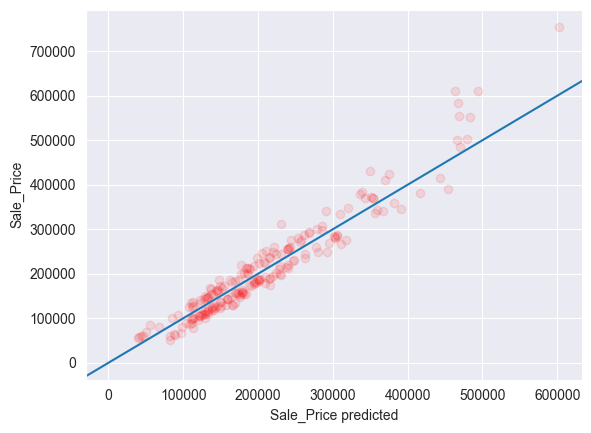

In [137]:
mean_error = np.mean(errors)
print("Mean error: {:.3f}".format(mean_error))

indexes = [i for i, v in enumerate(errors) if v > mean_error]
print("# test instances: {:d}, # instances over the mean: {:d}".format(len(errors), len(indexes)))

fig, axs = plt.subplots()
# axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(pred[indexes], real[indexes], 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

In [138]:
pred = np.exp(train_pre.tolist())
real = np.exp(Y_train.to_numpy().tolist())

errors = [float(pred[i]) - float(real[i]) for i in range(len(pred))]
errors = np.abs(errors)
errors

array([ 2708.97351991,  4461.04178504, 15977.47967593, ...,
        2792.79562917,  7278.22085919,   156.92243439])

Mean error: 8761.869
# test instances: 2341, # instances over the mean: 826


Text(0, 0.5, 'Sale_Price')

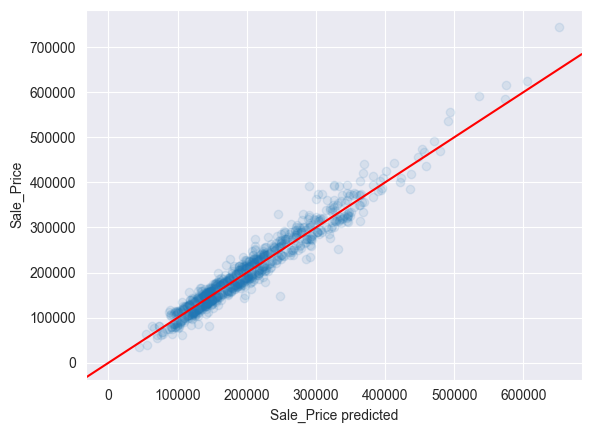

In [139]:
mean_error = np.mean(errors)
print("Mean error: {:.3f}".format(mean_error))

indexes = [i for i, v in enumerate(errors) if v > mean_error]
print("# test instances: {:d}, # instances over the mean: {:d}".format(len(errors), len(indexes)))

fig, axs = plt.subplots()
# axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(pred[indexes], real[indexes], 'o', alpha=0.1)
axs.axline((0, 0), slope=1, c="red")
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Proviamo a ridurre le feature

In [5]:
XGBModel = XGBRegressor(learning_rate=0.05,
                        n_estimators=2100,
                        max_depth=2,
                        min_child_weight=2,
                        gamma=0,
                        subsample=0.65,
                        colsample_bytree=0.46,
                        nthread=-1,
                        scale_pos_weight=1,
                        reg_alpha=0.464,
                        reg_lambda=0.8571,
                        random_state=7,
                        n_jobs=-1,
                        tree_method='gpu_hist',
                        gpu_id=0)

XGBModel.fit(X_train[FS_RF], Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.46,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=2100, n_jobs=-1,
             nthread=-1, num_parallel_tree=1, predictor='auto', ...)

In [6]:
test_pre = XGBModel.predict(X_test[FS_RF])
train_pre = XGBModel.predict(X_train[FS_RF])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 173461446.433
Test MSE: 389934753.522
Train R^2: 0.971
Test R^2: 0.952


Text(0, 0.5, 'Sale_Price')

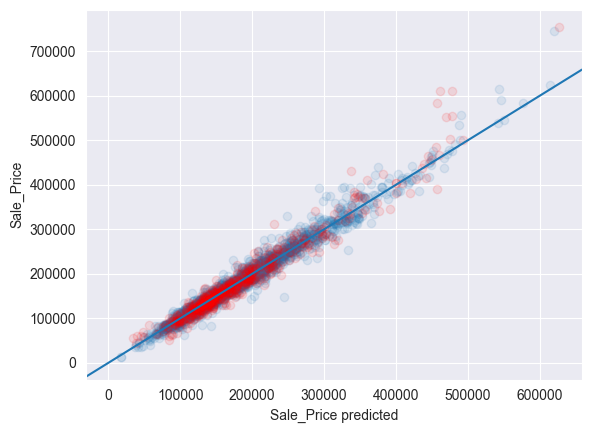

In [7]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Tuning dei parametri

In [8]:
params = {
    'n_estimators': [1000, 1500, 2000, 2500],
    'max_depth': [1, 3, 6],
    'min_child_weight': [1, 2, 3],
    'scale_pos_weight': [1, 2, 3]
}

gsearch = GridSearchCV(
    estimator=XGBRegressor(
        learning_rate=.05,
        gamma=0,
        subsample=0.65,
        colsample_bytree=0.46,
        reg_alpha=0.464,
        reg_lambda=0.8571,
        random_state=7,
        # Use GPU Accelerator
        tree_method='gpu_hist',
        gpu_id=0,
        n_jobs=-1,
        nthread=-1),
    param_grid=params,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5
)

gsearch.fit(X_train[FS_RF], Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=0.46,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.05, max_bin...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, nthread=-1,
                                    num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 6], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [1000, 1500, 2000, 2500],
                         'scale_pos_weight': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [9]:
test_pre = gsearch.predict(X_test[FS_RF])
train_pre = gsearch.predict(X_train[FS_RF])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 103662878.532
Test MSE: 406469107.249
Train R^2: 0.983
Test R^2: 0.950
